SINIFLANDIRMA MODELLERİ

1-Lojistik Regresyon

In [187]:
# GEREKLİ KÜTÜPHANELER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [188]:
# Önemsiz Hatalardan Kurtulmak İçin
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [189]:
df = pd.read_csv('diabetes.csv')

In [190]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [191]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [193]:
y = df["Outcome"]

In [194]:
x = df.drop(["Outcome"], axis=1)

In [195]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [196]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


1.1-Model ve Tahmin

In [197]:
logModel = LogisticRegression (solver = "liblinear").fit(x,y)

In [198]:
logModel

LogisticRegression(solver='liblinear')

In [199]:
logModel.intercept_

array([-5.89244725])

In [200]:
logModel.coef_

array([[ 1.17062307e-01,  2.83894485e-02, -1.68884383e-02,
         7.55570124e-04, -6.42898509e-04,  5.97750887e-02,
         6.77485486e-01,  7.24141933e-03]])

In [201]:
logModel.predict(x)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [202]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [203]:
yTahmin = logModel.predict(x)

In [204]:
confusion_matrix(y,yTahmin)

array([[448,  52],
       [121, 147]], dtype=int64)

In [205]:
accuracy_score(y,yTahmin)

0.7747395833333334

In [206]:
print(classification_report(y,yTahmin))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768


In [207]:
logModel.predict_proba(x)[0:10]

array([[0.35038673, 0.64961327],
       [0.9170336 , 0.0829664 ],
       [0.22474676, 0.77525324],
       [0.92140021, 0.07859979],
       [0.16726061, 0.83273939],
       [0.79899818, 0.20100182],
       [0.88020586, 0.11979414],
       [0.2781198 , 0.7218802 ],
       [0.3205832 , 0.6794168 ],
       [0.92275236, 0.07724764]])

1.2 Model Tuning

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [209]:
logCvModel = LogisticRegression (solver = "liblinear").fit(x_train,y_train)

In [210]:
logCvModel

LogisticRegression(solver='liblinear')

In [211]:
yTahmin = logModel.predict(x_test)

In [212]:
print(accuracy_score(y_test,yTahmin))

0.7662337662337663


In [213]:
crossValScore = cross_val_score(logModel,x_test,y_test)

In [214]:
crossValScore

array([0.78723404, 0.82608696, 0.82608696, 0.69565217, 0.73913043])

2-K EN YAKIN KOMŞU

2.1-Model ve Tahmin

In [215]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [216]:
knnModel = KNeighborsClassifier().fit(x_train,y_train)

In [217]:
knnModel

KNeighborsClassifier()

In [218]:
yTahmin = knnModel.predict(x_test)

In [219]:
accuracy_score(y_test,yTahmin)

0.6883116883116883

In [220]:
print(classification_report(y_test,yTahmin))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231


2.2-Model Tuning

In [221]:
knn = KNeighborsClassifier()

In [222]:
knnParams = {"n_neighbors":np.arange(1,50)}

In [223]:
knnParams

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [224]:
knnCvModel = GridSearchCV(knn,knnParams,cv=10).fit(x_train,y_train)

In [225]:
knnCvModel

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [226]:
knnCvModel.best_score_

0.748637316561845

In [227]:
knnCvModel.best_params_

{'n_neighbors': 11}

In [228]:
knnTuned = KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

In [229]:
yTahmin = knnTuned.predict(x_test)

In [230]:
accuracy_score(y_test,yTahmin)

0.7316017316017316

In [231]:
knnTuned.score(x_test,y_test)

0.7316017316017316

3-Destek Vektör Makineleri

3.1-Model ve Tahmini

In [232]:
svmModel = SVC(kernel="linear").fit(x_train,y_train)

In [233]:
svmModel

SVC(kernel='linear')

In [234]:
yTahmin = svmModel.predict(x_test)

In [235]:
accuracy_score(y_test,yTahmin)

0.7445887445887446

3.2-Model Tuning

In [236]:
svm = SVC()

In [237]:
svmParams = {"C":np.arange(1,10),"kernel":["linear","rbf","poly","sigmoid"]}

In [238]:
svmCvModel = GridSearchCV(svm, svmParams, cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [239]:
svmCvModel.best_score_

0.7839044652128765

In [240]:
svmCvModel.best_params_

{'C': 2, 'kernel': 'linear'}

Final Model

In [241]:
svmTuned = SVC(C = 2, kernel="linear").fit(x_train,y_train)

In [242]:
svmTuned

SVC(C=2, kernel='linear')

In [243]:
yTahmin = svmTuned.predict(x_test)

In [244]:
accuracy_score(y_test,yTahmin)

0.7445887445887446

4-Yapay Sinir Ağları

In [245]:
x_train, x_test, y_train, y_test =train_test_split (x,y,test_size=0.30,random_state=42)

In [246]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [247]:
scaler.fit(x_test)
x_test = scaler.transform(x_test)

4.1- Model ve Tahmin

In [248]:
mlpcModel = MLPClassifier().fit(x_train,y_train)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [249]:
mlpcModel.coefs_

[array([[ 2.84144237e-02,  1.37647067e-01,  7.83619104e-02,
          2.69254948e-02, -8.32187352e-02, -6.28267544e-02,
         -5.06609444e-02, -3.81851908e-01,  9.29790761e-02,
          5.11814125e-02, -7.07739246e-02, -4.12133682e-02,
          1.12942595e-01, -2.53853896e-01, -3.50843973e-02,
         -2.43016860e-02, -8.62339495e-02,  1.01486370e-01,
          9.04491740e-02,  8.67118748e-02, -2.78339495e-01,
          1.44932695e-01, -5.42381126e-01,  2.39308957e-01,
          1.25628222e-01, -2.59918342e-01, -1.05811333e-01,
          7.63854001e-03, -3.24766275e-01,  1.51144191e-01,
          1.48554524e-01,  2.41443507e-01, -2.53036615e-01,
          8.02244837e-02,  6.97035483e-02,  1.94352477e-01,
         -5.21206766e-02,  6.72208719e-02,  2.62617598e-01,
         -8.81715719e-02, -6.91949057e-02, -2.22643058e-01,
          2.65154575e-02,  3.10649393e-03,  5.24917042e-02,
         -3.54096997e-01,  1.89656054e-01,  1.44696441e-01,
         -1.37465766e-02, -1.14625228e-0

In [250]:
print(mlpcModel.intercepts_)

[array([ 0.16897825,  0.1555515 ,  0.24368917,  0.04599973, -0.0138508 ,
        0.12268847,  0.06606807,  0.03588958,  0.08710528,  0.06788506,
        0.05330707,  0.24377298,  0.19526471, -0.03686466, -0.07400743,
        0.02237032,  0.02531679,  0.08955938, -0.21037777, -0.1143951 ,
       -0.09027348, -0.0396439 , -0.23348408, -0.10655841,  0.21244714,
        0.0279376 , -0.04038907, -0.14995322,  0.01235455, -0.01502254,
       -0.01078094, -0.02734418, -0.05768477,  0.33181259,  0.11074467,
        0.27317393,  0.09389024, -0.3870946 , -0.03625893, -0.03101063,
        0.10690234,  0.13907137, -0.0171668 ,  0.12714407, -0.26535953,
       -0.10996285,  0.21433765,  0.05583694,  0.28489375, -0.1244145 ,
       -0.17975586,  0.26502457, -0.0606069 ,  0.20335688,  0.122438  ,
        0.22106667, -0.33452584,  0.16226324,  0.09356209, -0.29003172,
        0.24635609, -0.06945402,  0.28802237, -0.0735563 , -0.03284915,
       -0.13460258, -0.04475328, -0.35512053,  0.23520975,  0.1

In [251]:
yTahmin =mlpcModel.predict(x_test)

In [252]:
accuracy_score(y_test,yTahmin)

0.7359307359307359

4.2-Model Tuning

In [253]:
mlpcParams ={"alpha":[1,2,3,5,0.1,0.01,0.03,0.4,0.005,0.0001], "hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)]}

In [254]:
mlpc = MLPClassifier(solver="lbfgs")

In [255]:
mlpcCvModel =GridSearchCV(mlpc,mlpcParams,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\arda_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [256]:
mlpcCvModel.best_params_

{'alpha': 5, 'hidden_layer_sizes': (3, 5)}

4.3-Final Model

In [257]:
mlpcTuned =MLPClassifier(solver="lbfgs",alpha=5,hidden_layer_sizes=(3,5)).fit(x_train,y_train)

In [258]:
yTahmin = mlpcModel.predict(x_test) 

In [259]:
accuracy_score(y_test,yTahmin)

0.7359307359307359

5-Cart Modeli

5.1- Model ve Tahmin

In [260]:
cartModel = DecisionTreeClassifier().fit(x_train,y_train)

In [261]:
yTahmin = cartModel.predict(x_test)

In [262]:
accuracy_score(y_test,yTahmin)

0.7272727272727273

5.2-Model Tuning

In [263]:
cart = DecisionTreeClassifier()

In [264]:
cartParams = {"max_depth": [1,3,5,8,10],"min_samples_leaf":[1,3,5,10,20,50]}

In [265]:
cartCvModel = GridSearchCV(cart,cartParams,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [266]:
cartCvModel.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

5.3 Final Model

In [267]:
cartTuned =DecisionTreeClassifier(max_depth=5,min_samples_leaf=10).fit(x_train,y_train)

In [268]:
yTahmin = cartTuned.predict(x_train)

In [269]:
accuracy_score(y_train,yTahmin)

0.8063314711359404

6-Random Forests

6.1-Model ve Tahmin

In [270]:
rfModel = RandomForestClassifier().fit(x_train,y_train)

In [271]:
yTahmin = rfModel.predict(x_test)

In [272]:
accuracy_score(y_test,yTahmin)

0.7489177489177489

6.2-Model Tuning

In [273]:
rf = RandomForestClassifier()

In [274]:
rfParams = {"n_estimators":[100,200,500,1000],"max_features":[2,4,6,8],"min_samples_split":[2,5,10,20]}

In [275]:
rfCvModel = GridSearchCV(rf,rfParams,cv=10,n_jobs=-1,verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [276]:
rfCvModel.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 100}

6.3 Final Modeli

In [277]:
rfTuned = RandomForestClassifier(max_features=4,min_samples_split=10,n_estimators=100).fit(x_train,y_train)

In [278]:
yTahmin = rfTuned.predict(x_test)

In [279]:
accuracy_score(y_test,yTahmin)

0.7445887445887446

6.4 Değişken Önem Düzeyi

In [280]:
rfTuned

RandomForestClassifier(max_features=4, min_samples_split=10)

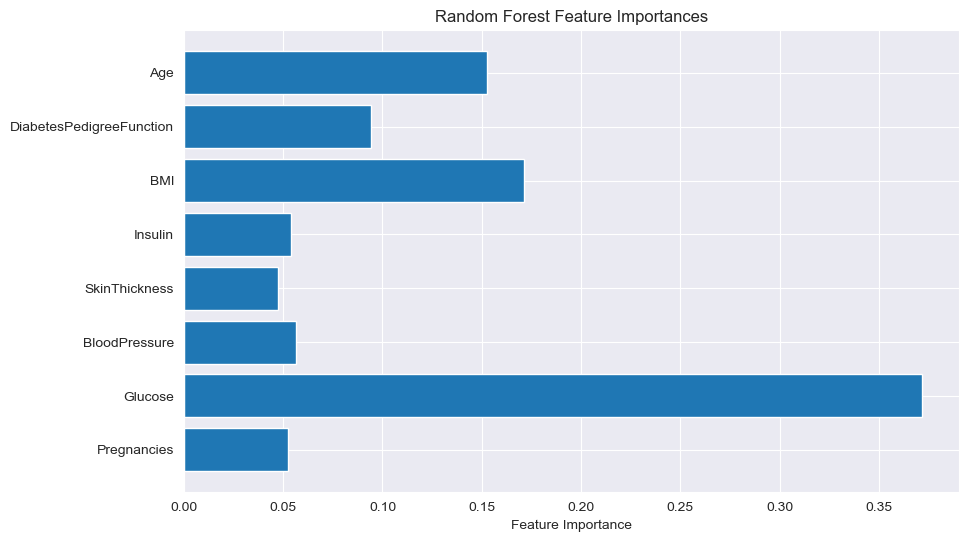

In [281]:
feature_importances = pd.Series(rfTuned.feature_importances_)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

7-GBoost

7.1-Model ve Tahmin

In [282]:
gbmModel = GradientBoostingClassifier().fit(x_train,y_train)

In [283]:
gbmModel?

In [284]:
yTahmin =gbmModel.predict(x_test)

In [285]:
accuracy_score(y_test,yTahmin)

0.7316017316017316

7.2-Model Tuning

In [286]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have your data x_train and y_train
gbm = GradientBoostingClassifier()
gbmParams = {"learning_rate": [0.1, 0.01, 0.001, 0.05], "n_estimators": [100, 300, 500, 1000], "max_depth": [1, 3, 5, 7, 9]}

gbmCvModel = GridSearchCV(estimator=gbm, param_grid=gbmParams, cv=10, n_jobs=-1, verbose=2)
gbmCvModel.fit(x_train, y_train)
best_params = gbmCvModel.best_params_
print(best_params)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}


7.3-Final Model

In [287]:
gbmTuned = GradientBoostingClassifier(learning_rate=0.05,
                                      max_depth=1,
                                      n_estimators=100).fit(x_train,y_train)

In [288]:
yTahmin = gbmTuned.predict(x_test)

In [289]:
accuracy_score(y_test,yTahmin)

0.7619047619047619

7.4-Değişken Önem Sırası

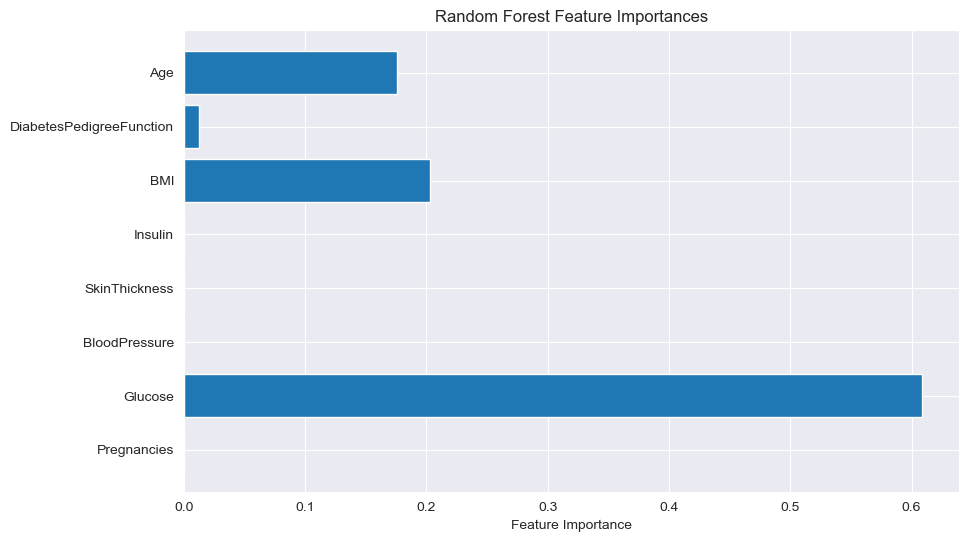

In [290]:
gbmTuned
feature_importances = pd.Series(gbmTuned.feature_importances_)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

8-XGBoost

In [291]:
!pip install xgboost

In [292]:
from xgboost import XGBClassifier

8.1-Model ve Tahmin

In [293]:
xgbModel = XGBClassifier().fit(x_train,y_train)

In [294]:
xgbModel?

In [295]:
yTahmin = xgbModel.predict(x_test)

In [296]:
accuracy_score(y_test,yTahmin)

0.7532467532467533

8.2- Model Tuning

In [297]:
xgb = XGBClassifier()

In [298]:
xgbParams = {"n_estimators":[100,500,1000,2000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.001],}

In [299]:
xgbCvModel = GridSearchCV(xgb,xgbParams,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [300]:
xgbCvModel.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 2000, 'subsample': 1}

In [301]:
xgbTuned = XGBClassifier(learning_rate=0.001,n_estimators=200,subsample=1,max_depth=7).fit(x_train,y_train)

In [302]:
yTahmin = xgbTuned.predict(x_test)

In [303]:
accuracy_score(y_test,yTahmin)

0.6536796536796536

8.3 Değişken Önem Sırası

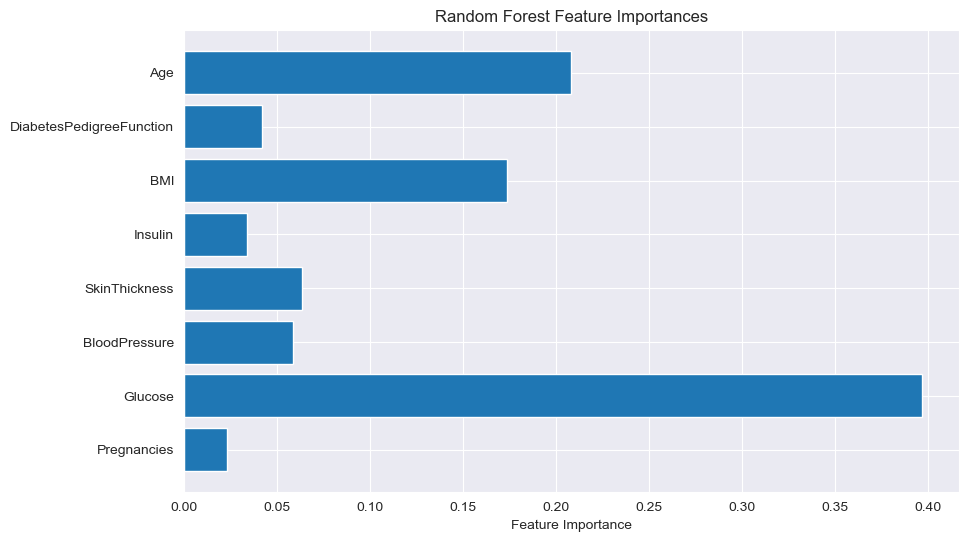

In [304]:
xgbTuned
feature_importances = pd.Series(xgbTuned.feature_importances_)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

9-LGBM

In [305]:
!pip install lightgbm

In [306]:
from lightgbm import LGBMClassifier

9.1-Model ve Tahmin

In [307]:
lgbmModel = LGBMClassifier().fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [308]:
lgbmModel?

In [309]:
yTahmin = lgbmModel.predict(x_test)

In [310]:
accuracy_score(y_test,yTahmin)

0.7445887445887446

9.2-Model Tuning

In [311]:
lgbm = LGBMClassifier()

In [312]:
lgbmParams = {"learning_rate":[0.01,0.01,0.1],"n_estimators":[200,500,1000],"max_depth":[1,2,35,8]}

In [313]:
lgbmCvModel = GridSearchCV(lgbm,lgbmParams,cv = 10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630


In [314]:
lgbmCvModel.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

9.3-Final Modeli

In [315]:
lgbmTuned = LGBMClassifier(learning_rate=0.01,max_depth=1,n_estimators=500).fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630


In [316]:
yTahmin = lgbmTuned.predict(x_test)

In [317]:
accuracy_score(y_test,yTahmin)

0.7575757575757576

9.4 Değişken Önem Sırası

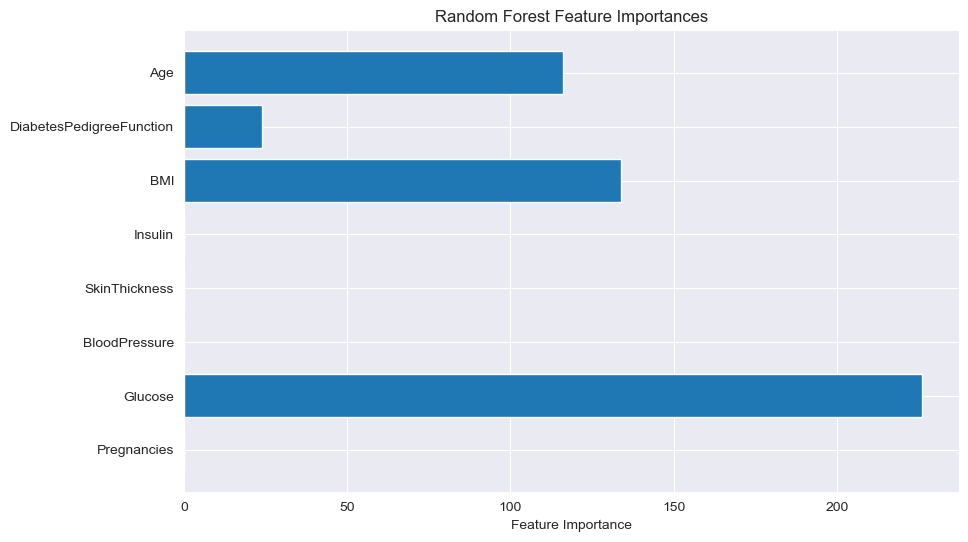

In [318]:
lgbmTuned
feature_importances = pd.Series(lgbmTuned.feature_importances_)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

10-CatBoost

In [345]:
!pip install catboost

In [346]:
from catboost import CatBoostClassifier

10.1-Model ve Tahmin

In [347]:
catbmodel = CatBoostClassifier().fit(x_train,y_train,verbose = False)

In [348]:
yTahmin = catbmodel.predict(x_test)

In [349]:
accuracy_score(y_test,yTahmin)

0.7445887445887446

In [350]:
catbmodel?

10.2-Model Tuning

In [358]:
catb = CatBoostClassifier(verbose=False)

In [362]:
catbParams = {"iterations":[200,500,1000],"learning_rate":[0.01,0.03,0.1],"depth":[4,5,8]}

In [363]:
catbCvModel = GridSearchCV(catb,catbParams,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [364]:
catbCvModel.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

10.3-Final Modeli

In [369]:
catbTuned = CatBoostClassifier(depth=8,iterations=200,learning_rate=0.01).fit(x_train,y_train)

0:	learn: 0.6863312	total: 3.13ms	remaining: 624ms
1:	learn: 0.6811157	total: 6.09ms	remaining: 603ms
2:	learn: 0.6752970	total: 8.63ms	remaining: 566ms
3:	learn: 0.6697432	total: 11.1ms	remaining: 544ms
4:	learn: 0.6641758	total: 13.9ms	remaining: 542ms
5:	learn: 0.6576656	total: 16.6ms	remaining: 537ms
6:	learn: 0.6521870	total: 19.3ms	remaining: 532ms
7:	learn: 0.6465564	total: 21.8ms	remaining: 523ms
8:	learn: 0.6407595	total: 24.3ms	remaining: 516ms
9:	learn: 0.6357725	total: 26.8ms	remaining: 508ms
10:	learn: 0.6299942	total: 29.2ms	remaining: 502ms
11:	learn: 0.6240480	total: 31.8ms	remaining: 497ms
12:	learn: 0.6196095	total: 34.3ms	remaining: 494ms
13:	learn: 0.6148715	total: 36.7ms	remaining: 487ms
14:	learn: 0.6092626	total: 39ms	remaining: 482ms
15:	learn: 0.6046764	total: 41.6ms	remaining: 479ms
16:	learn: 0.6012725	total: 44.2ms	remaining: 476ms
17:	learn: 0.5958121	total: 46.8ms	remaining: 473ms
18:	learn: 0.5903243	total: 49.2ms	remaining: 468ms
19:	learn: 0.5866024	tot

In [370]:
yTahmin = catbTuned.predict(x_test)

In [371]:
accuracy_score(y_test,yTahmin)

0.7575757575757576

10.4 Değişken Önem Sırası

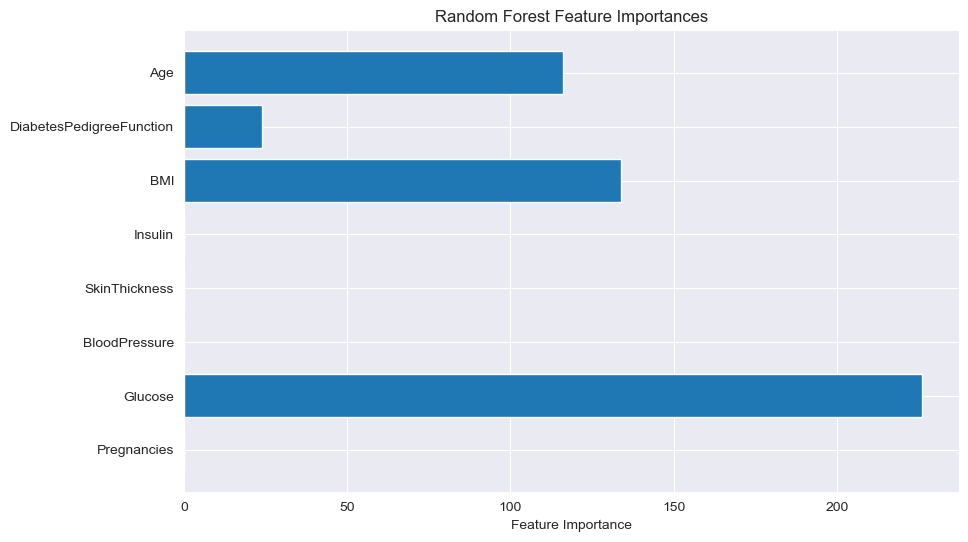

In [372]:
lgbmTuned
feature_importances = pd.Series(lgbmTuned.feature_importances_)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

11-Tüm Modellerin Karşılaştırılması

In [387]:
from sklearn.metrics import accuracy_score
import pandas as pd

modeller = [knnTuned, logModel, svmTuned, mlpcTuned, cartTuned, rfTuned, gbmTuned, catbTuned, lgbmTuned, xgbTuned]
sonuclar_list = []

for model in modeller:
    isimler = model.__class__.__name__
    
    try:
        # Assuming x_test is a DataFrame, you can get the feature names
        feature_names = x_test.columns.tolist()
        
        # Use feature names when making predictions
        y_pred = model.predict(x_test)
    except AttributeError:
        # If AttributeError occurs, proceed without feature names
        y_pred = model.predict(x_test)
    
    dogruluk = accuracy_score(y_test, y_pred)
    
    sonuc = {"Modeller": isimler, "Accuracy": dogruluk * 100}
    sonuclar_list.append(sonuc)

sonuclar = pd.DataFrame(sonuclar_list)


C:\Users\arda_\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Modellerin Doğruluk Oranları:')

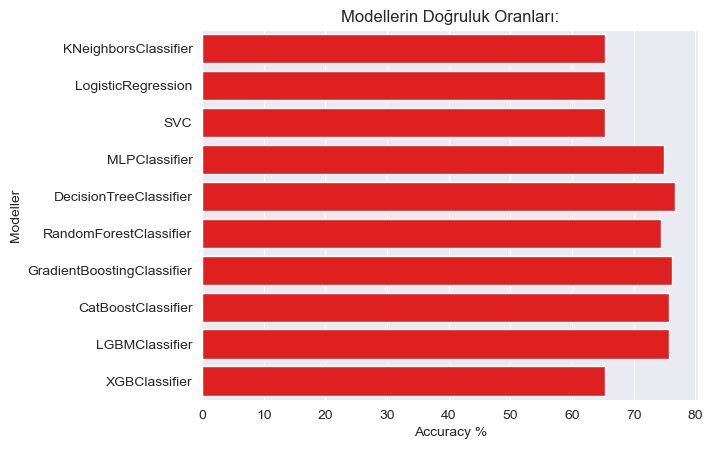

In [390]:

sns.barplot(x= "Accuracy", y= "Modeller",data= sonuclar,color ="r")
plt.xlabel("Accuracy %" )
plt.title("Modellerin Doğruluk Oranları:")

In [391]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,65.367965
1,LogisticRegression,65.367965
2,SVC,65.367965
3,MLPClassifier,74.891775
4,DecisionTreeClassifier,76.623377
5,RandomForestClassifier,74.458874
6,GradientBoostingClassifier,76.190476
7,CatBoostClassifier,75.757576
8,LGBMClassifier,75.757576
9,XGBClassifier,65.367965
